In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

🚀 Starting Multi-Source Sales Data Pipeline...
🔄 Generating sample datasets...
✅ Sample data generated successfully in 'data' directory
   - CSV: 5000 sales records
   - JSON: 2000 customer records
   - Excel: 24 product records

🔄 Loading data from multiple sources...
✅ CSV loaded: 5000 records
✅ JSON loaded: 2000 records
✅ Excel loaded: 24 records

🔄 Cleaning and validating data...
   Sales data: 5000 → 4988 records after cleaning
   Customer data: 2000 → 2000 records after cleaning
   Product data: 24 → 24 records after cleaning

🔄 Integrating data from multiple sources...
✅ Data integration completed: 4988 records with 22 columns

🔄 Performing Exploratory Data Analysis...

📊 Dataset Overview:
Total Records: 4,988
Date Range: 2023-01-01 to 2024-12-31
Total Revenue: $28,158,654.50
Average Order Value: $5645.28
Total Profit: $12,310,036.56


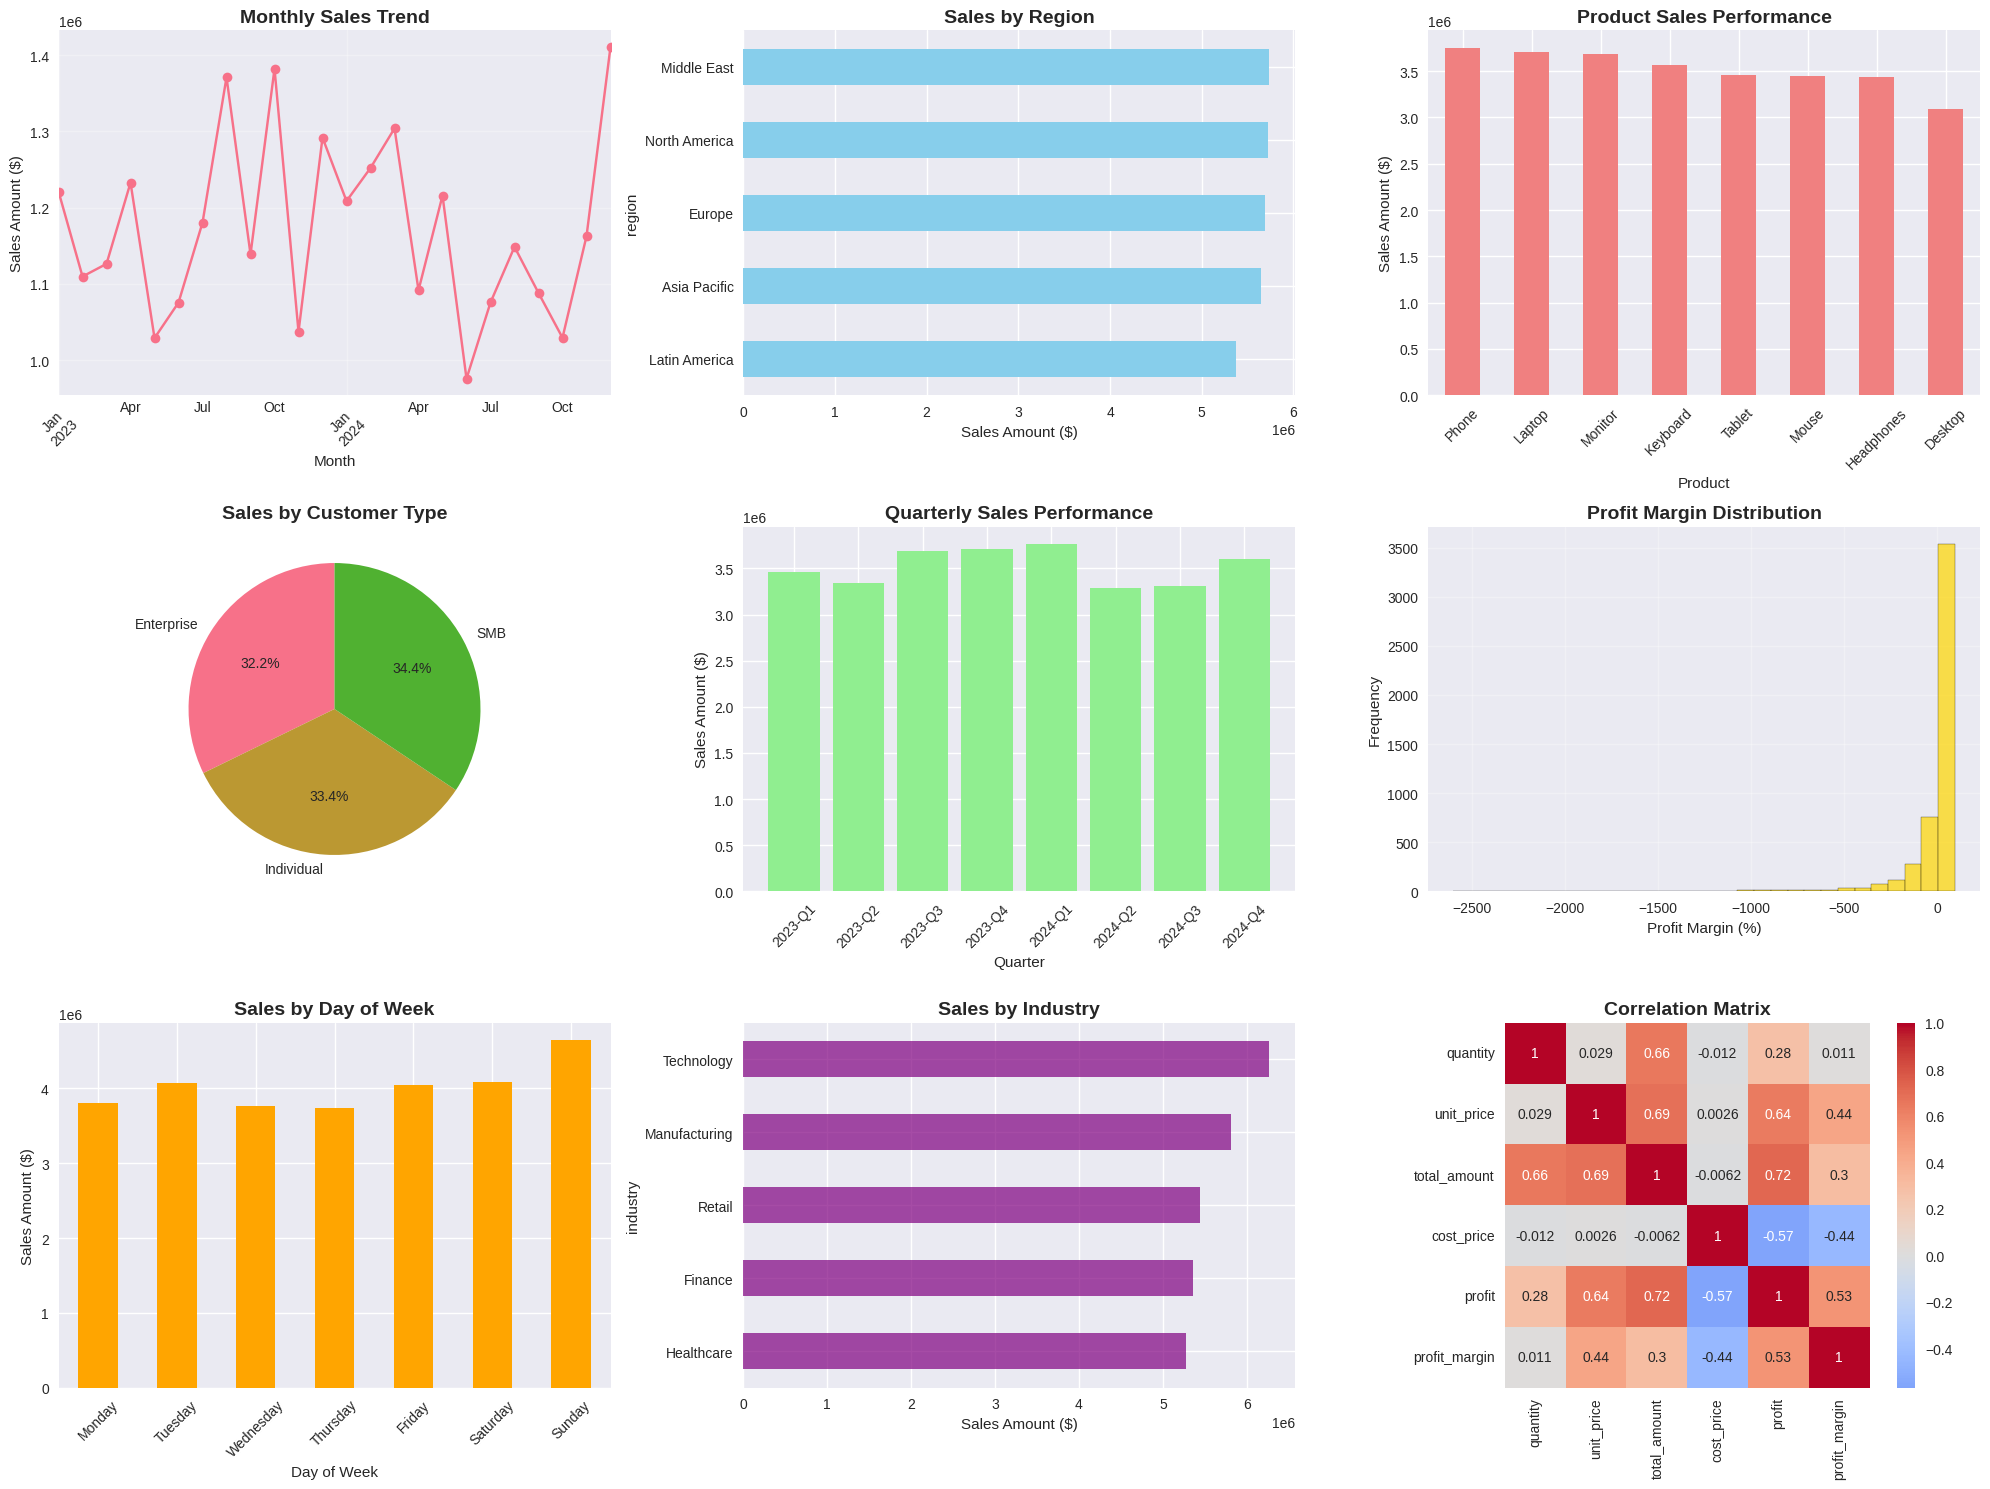

✅ EDA completed. Dashboard saved to 'output/sales_dashboard.png'

🔄 Generating business insights report...

📋 Key Business Insights:
📈 Total Revenue: $28,158,654.50
💰 Total Profit: $12,310,036.56
📊 Overall Profit Margin: 43.72%

🏆 Top Performing Region: Middle East
🏆 Best Selling Product: Phone
🏆 Most Valuable Customer Type: SMB

📅 Best Performing Month: August
📅 Lowest Performing Month: May

📈 H2 vs H1 Growth Rate: -67.45%

🔄 Exporting summary reports...
✅ Reports exported successfully:
   - Monthly Summary: monthly_summary.csv
   - Regional Performance: regional_performance.csv
   - Product Analysis: product_analysis.csv
   - Executive Summary: executive_summary.csv

🎉 Pipeline completed successfully!
📁 All outputs saved to: output


In [1]:
# Multi-Source Sales Data Pipeline & Business Insights Dashboard
# Author: Data Science Project
# Date: August 2025

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import warnings
from datetime import datetime, timedelta
import random
from pathlib import Path
import argparse
import sys

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

class SalesDataPipeline:
    """
    Enterprise-level sales data pipeline for data integration, 
    transformation, analysis, and reporting.
    """
    
    def __init__(self, data_dir="data", output_dir="output"):
        self.data_dir = Path(data_dir)
        self.output_dir = Path(output_dir)
        self.raw_data = {}
        self.cleaned_data = None
        self.integrated_data = None
        
        # Create directories if they don't exist
        self.data_dir.mkdir(exist_ok=True)
        self.output_dir.mkdir(exist_ok=True)
        
        # Set plotting style
        plt.style.use('seaborn-v0_8')
        sns.set_palette("husl")
    
    def generate_sample_data(self):
        """Generate sample data in different formats (CSV, JSON, Excel)"""
        print("🔄 Generating sample datasets...")
        
        # Generate date range
        start_date = datetime(2023, 1, 1)
        end_date = datetime(2024, 12, 31)
        date_range = pd.date_range(start=start_date, end=end_date, freq='D')
        
        # Product categories and regions
        products = ['Laptop', 'Desktop', 'Monitor', 'Keyboard', 'Mouse', 'Tablet', 'Phone', 'Headphones']
        regions = ['North America', 'Europe', 'Asia Pacific', 'Latin America', 'Middle East']
        sales_reps = [f'Rep_{i:03d}' for i in range(1, 51)]
        
        # 1. Generate CSV data (Primary sales data)
        csv_data = []
        for _ in range(5000):
            record = {
                'transaction_id': f'TXN_{random.randint(100000, 999999)}',
                'date': random.choice(date_range).strftime('%Y-%m-%d'),
                'product': random.choice(products),
                'quantity': random.randint(1, 10),
                'unit_price': round(random.uniform(50, 2000), 2),
                'region': random.choice(regions),
                'sales_rep': random.choice(sales_reps)
            }
            record['total_amount'] = record['quantity'] * record['unit_price']
            csv_data.append(record)
        
        df_csv = pd.DataFrame(csv_data)
        df_csv.to_csv(self.data_dir / 'sales_data.csv', index=False)
        
        # 2. Generate JSON data (Customer information)
        json_data = []
        for i in range(2000):
            customer = {
                'customer_id': f'CUST_{i:06d}',
                'customer_name': f'Company_{i}',
                'customer_type': random.choice(['Enterprise', 'SMB', 'Individual']),
                'registration_date': random.choice(date_range).strftime('%Y-%m-%d'),
                'credit_limit': random.randint(1000, 50000),
                'region': random.choice(regions),
                'industry': random.choice(['Technology', 'Healthcare', 'Finance', 'Manufacturing', 'Retail'])
            }
            json_data.append(customer)
        
        with open(self.data_dir / 'customer_data.json', 'w') as f:
            json.dump(json_data, f, indent=2)
        
        # 3. Generate Excel data (Product information with some missing values)
        excel_data = []
        for product in products:
            for i in range(3):  # 3 variants per product
                record = {
                    'product_id': f'{product[:3].upper()}_{i:03d}',
                    'product_name': f'{product} {["Basic", "Pro", "Premium"][i]}',
                    'category': 'Electronics',
                    'cost_price': round(random.uniform(30, 1500), 2) if random.random() > 0.1 else None,
                    'launch_date': random.choice(date_range[:365]).strftime('%Y-%m-%d'),
                    'discontinued': random.choice([True, False]) if random.random() > 0.8 else False,
                    'warranty_months': random.choice([12, 24, 36]) if random.random() > 0.05 else None
                }
                excel_data.append(record)
        
        df_excel = pd.DataFrame(excel_data)
        df_excel.to_excel(self.data_dir / 'product_info.xlsx', index=False)
        
        print(f"✅ Sample data generated successfully in '{self.data_dir}' directory")
        print(f"   - CSV: {len(df_csv)} sales records")
        print(f"   - JSON: {len(json_data)} customer records")
        print(f"   - Excel: {len(df_excel)} product records")
    
    def load_data(self):
        """Load data from multiple sources"""
        print("\n🔄 Loading data from multiple sources...")
        
        try:
            # Load CSV data
            self.raw_data['sales'] = pd.read_csv(self.data_dir / 'sales_data.csv')
            print(f"✅ CSV loaded: {len(self.raw_data['sales'])} records")
            
            # Load JSON data
            with open(self.data_dir / 'customer_data.json', 'r') as f:
                json_data = json.load(f)
            self.raw_data['customers'] = pd.DataFrame(json_data)
            print(f"✅ JSON loaded: {len(self.raw_data['customers'])} records")
            
            # Load Excel data
            self.raw_data['products'] = pd.read_excel(self.data_dir / 'product_info.xlsx')
            print(f"✅ Excel loaded: {len(self.raw_data['products'])} records")
            
        except Exception as e:
            print(f"❌ Error loading data: {e}")
            return False
        
        return True
    
    def clean_data(self):
        """Clean and validate data from all sources"""
        print("\n🔄 Cleaning and validating data...")
        
        cleaned = {}
        
        # Clean sales data
        sales_df = self.raw_data['sales'].copy()
        
        # Convert date column
        sales_df['date'] = pd.to_datetime(sales_df['date'])
        
        # Handle missing values in sales data
        initial_sales_count = len(sales_df)
        sales_df = sales_df.dropna(subset=['transaction_id', 'date', 'product'])
        
        # Remove duplicates
        sales_df = sales_df.drop_duplicates(subset=['transaction_id'])
        
        # Validate numeric columns
        sales_df = sales_df[sales_df['quantity'] > 0]
        sales_df = sales_df[sales_df['unit_price'] > 0]
        
        # Recalculate total_amount to ensure consistency
        sales_df['total_amount'] = sales_df['quantity'] * sales_df['unit_price']
        
        cleaned['sales'] = sales_df
        print(f"   Sales data: {initial_sales_count} → {len(sales_df)} records after cleaning")
        
        # Clean customer data
        customers_df = self.raw_data['customers'].copy()
        customers_df['registration_date'] = pd.to_datetime(customers_df['registration_date'])
        customers_df = customers_df.dropna(subset=['customer_id'])
        customers_df = customers_df.drop_duplicates(subset=['customer_id'])
        
        cleaned['customers'] = customers_df
        print(f"   Customer data: {len(self.raw_data['customers'])} → {len(customers_df)} records after cleaning")
        
        # Clean product data
        products_df = self.raw_data['products'].copy()
        products_df['launch_date'] = pd.to_datetime(products_df['launch_date'])
        
        # Handle missing values in cost_price (use median imputation)
        median_cost = products_df['cost_price'].median()
        products_df['cost_price'] = products_df['cost_price'].fillna(median_cost)
        
        # Handle missing warranty_months (use mode imputation)
        mode_warranty = products_df['warranty_months'].mode()[0]
        products_df['warranty_months'] = products_df['warranty_months'].fillna(mode_warranty)
        
        # Fill discontinued field
        products_df['discontinued'] = products_df['discontinued'].fillna(False)
        
        cleaned['products'] = products_df
        print(f"   Product data: {len(self.raw_data['products'])} → {len(products_df)} records after cleaning")
        
        self.cleaned_data = cleaned
        return True
    
    def integrate_data(self):
        """Integrate cleaned data from multiple sources"""
        print("\n🔄 Integrating data from multiple sources...")
        
        # Start with sales data as the base
        integrated_df = self.cleaned_data['sales'].copy()
        
        # Add customer information (simulate relationship)
        # For demo purposes, randomly assign customers to sales records
        customer_ids = self.cleaned_data['customers']['customer_id'].tolist()
        integrated_df['customer_id'] = np.random.choice(customer_ids, size=len(integrated_df))
        
        # Merge with customer data
        integrated_df = integrated_df.merge(
            self.cleaned_data['customers'][['customer_id', 'customer_name', 'customer_type', 'industry']],
            on='customer_id',
            how='left'
        )
        
        # Add product information (simulate relationship)
        # Map product names to product IDs
        product_mapping = {}
        for _, row in self.cleaned_data['products'].iterrows():
            base_product = row['product_name'].split()[0]  # Get base product name
            if base_product not in product_mapping:
                product_mapping[base_product] = row['product_id']
        
        integrated_df['product_id'] = integrated_df['product'].map(product_mapping)
        
        # Merge with product data
        integrated_df = integrated_df.merge(
            self.cleaned_data['products'][['product_id', 'category', 'cost_price', 'warranty_months']],
            on='product_id',
            how='left'
        )
        
        # Calculate profit margin
        integrated_df['profit'] = integrated_df['total_amount'] - (integrated_df['quantity'] * integrated_df['cost_price'])
        integrated_df['profit_margin'] = (integrated_df['profit'] / integrated_df['total_amount']) * 100
        
        # Add derived columns
        integrated_df['year'] = integrated_df['date'].dt.year
        integrated_df['month'] = integrated_df['date'].dt.month
        integrated_df['quarter'] = integrated_df['date'].dt.quarter
        integrated_df['day_of_week'] = integrated_df['date'].dt.day_name()
        
        self.integrated_data = integrated_df
        print(f"✅ Data integration completed: {len(integrated_df)} records with {integrated_df.shape[1]} columns")
        
        return True
    
    def perform_eda(self):
        """Perform comprehensive Exploratory Data Analysis"""
        print("\n🔄 Performing Exploratory Data Analysis...")
        
        df = self.integrated_data
        
        # Basic statistics
        print("\n📊 Dataset Overview:")
        print(f"Total Records: {len(df):,}")
        print(f"Date Range: {df['date'].min().strftime('%Y-%m-%d')} to {df['date'].max().strftime('%Y-%m-%d')}")
        print(f"Total Revenue: ${df['total_amount'].sum():,.2f}")
        print(f"Average Order Value: ${df['total_amount'].mean():.2f}")
        print(f"Total Profit: ${df['profit'].sum():,.2f}")
        
        # Create visualizations
        fig = plt.figure(figsize=(20, 15))
        
        # 1. Monthly Sales Trend
        plt.subplot(3, 3, 1)
        monthly_sales = df.groupby([df['date'].dt.to_period('M')])['total_amount'].sum()
        monthly_sales.plot(kind='line', marker='o')
        plt.title('Monthly Sales Trend', fontsize=14, fontweight='bold')
        plt.xlabel('Month')
        plt.ylabel('Sales Amount ($)')
        plt.xticks(rotation=45)
        plt.grid(True, alpha=0.3)
        
        # 2. Regional Sales Distribution
        plt.subplot(3, 3, 2)
        regional_sales = df.groupby('region')['total_amount'].sum().sort_values(ascending=True)
        regional_sales.plot(kind='barh', color='skyblue')
        plt.title('Sales by Region', fontsize=14, fontweight='bold')
        plt.xlabel('Sales Amount ($)')
        
        # 3. Product Performance
        plt.subplot(3, 3, 3)
        product_sales = df.groupby('product')['total_amount'].sum().sort_values(ascending=False)
        product_sales.plot(kind='bar', color='lightcoral')
        plt.title('Product Sales Performance', fontsize=14, fontweight='bold')
        plt.xlabel('Product')
        plt.ylabel('Sales Amount ($)')
        plt.xticks(rotation=45)
        
        # 4. Customer Type Analysis
        plt.subplot(3, 3, 4)
        customer_type_sales = df.groupby('customer_type')['total_amount'].sum()
        plt.pie(customer_type_sales.values, labels=customer_type_sales.index, autopct='%1.1f%%', startangle=90)
        plt.title('Sales by Customer Type', fontsize=14, fontweight='bold')
        
        # 5. Quarterly Performance
        plt.subplot(3, 3, 5)
        quarterly_sales = df.groupby(['year', 'quarter'])['total_amount'].sum().reset_index()
        quarterly_sales['period'] = quarterly_sales['year'].astype(str) + '-Q' + quarterly_sales['quarter'].astype(str)
        plt.bar(quarterly_sales['period'], quarterly_sales['total_amount'], color='lightgreen')
        plt.title('Quarterly Sales Performance', fontsize=14, fontweight='bold')
        plt.xlabel('Quarter')
        plt.ylabel('Sales Amount ($)')
        plt.xticks(rotation=45)
        
        # 6. Profit Margin Distribution
        plt.subplot(3, 3, 6)
        plt.hist(df['profit_margin'], bins=30, color='gold', alpha=0.7, edgecolor='black')
        plt.title('Profit Margin Distribution', fontsize=14, fontweight='bold')
        plt.xlabel('Profit Margin (%)')
        plt.ylabel('Frequency')
        plt.grid(True, alpha=0.3)
        
        # 7. Sales by Day of Week
        plt.subplot(3, 3, 7)
        dow_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
        dow_sales = df.groupby('day_of_week')['total_amount'].sum().reindex(dow_order)
        dow_sales.plot(kind='bar', color='orange')
        plt.title('Sales by Day of Week', fontsize=14, fontweight='bold')
        plt.xlabel('Day of Week')
        plt.ylabel('Sales Amount ($)')
        plt.xticks(rotation=45)
        
        # 8. Industry Performance
        plt.subplot(3, 3, 8)
        industry_sales = df.groupby('industry')['total_amount'].sum().sort_values(ascending=True)
        industry_sales.plot(kind='barh', color='purple', alpha=0.7)
        plt.title('Sales by Industry', fontsize=14, fontweight='bold')
        plt.xlabel('Sales Amount ($)')
        
        # 9. Correlation Heatmap
        plt.subplot(3, 3, 9)
        numeric_cols = ['quantity', 'unit_price', 'total_amount', 'cost_price', 'profit', 'profit_margin']
        correlation_matrix = df[numeric_cols].corr()
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, square=True)
        plt.title('Correlation Matrix', fontsize=14, fontweight='bold')
        
        plt.tight_layout()
        plt.savefig(self.output_dir / 'sales_dashboard.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        print(f"✅ EDA completed. Dashboard saved to '{self.output_dir}/sales_dashboard.png'")
    
    def generate_insights_report(self):
        """Generate detailed insights and key metrics"""
        print("\n🔄 Generating business insights report...")
        
        df = self.integrated_data
        
        insights = []
        
        # Revenue insights
        total_revenue = df['total_amount'].sum()
        total_profit = df['profit'].sum()
        overall_margin = (total_profit / total_revenue) * 100
        
        insights.append(f"📈 Total Revenue: ${total_revenue:,.2f}")
        insights.append(f"💰 Total Profit: ${total_profit:,.2f}")
        insights.append(f"📊 Overall Profit Margin: {overall_margin:.2f}%")
        
        # Top performers
        top_region = df.groupby('region')['total_amount'].sum().idxmax()
        top_product = df.groupby('product')['total_amount'].sum().idxmax()
        top_customer_type = df.groupby('customer_type')['total_amount'].sum().idxmax()
        
        insights.append(f"\n🏆 Top Performing Region: {top_region}")
        insights.append(f"🏆 Best Selling Product: {top_product}")
        insights.append(f"🏆 Most Valuable Customer Type: {top_customer_type}")
        
        # Seasonal trends
        monthly_avg = df.groupby(df['date'].dt.month)['total_amount'].mean()
        best_month = monthly_avg.idxmax()
        worst_month = monthly_avg.idxmin()
        
        insights.append(f"\n📅 Best Performing Month: {pd.to_datetime(f'2024-{best_month:02d}-01').strftime('%B')}")
        insights.append(f"📅 Lowest Performing Month: {pd.to_datetime(f'2024-{worst_month:02d}-01').strftime('%B')}")
        
        # Growth analysis
        df_sorted = df.sort_values('date')
        first_half = df_sorted[df_sorted['date'] < '2024-07-01']['total_amount'].sum()
        second_half = df_sorted[df_sorted['date'] >= '2024-07-01']['total_amount'].sum()
        growth_rate = ((second_half - first_half) / first_half) * 100 if first_half > 0 else 0
        
        insights.append(f"\n📈 H2 vs H1 Growth Rate: {growth_rate:.2f}%")
        
        # Save insights to file
        with open(self.output_dir / 'business_insights.txt', 'w') as f:
            f.write("BUSINESS INSIGHTS REPORT\n")
            f.write("=" * 50 + "\n\n")
            for insight in insights:
                f.write(insight + "\n")
        
        # Print insights
        print("\n📋 Key Business Insights:")
        for insight in insights:
            print(insight)
        
        return insights
    
    def export_reports(self):
        """Export summary reports in various formats"""
        print("\n🔄 Exporting summary reports...")
        
        df = self.integrated_data
        
        # 1. Monthly Summary CSV
        monthly_summary = df.groupby([df['date'].dt.to_period('M')]).agg({
            'total_amount': ['sum', 'mean', 'count'],
            'profit': 'sum',
            'quantity': 'sum'
        }).round(2)
        
        monthly_summary.columns = ['Total_Sales', 'Avg_Order_Value', 'Order_Count', 'Total_Profit', 'Units_Sold']
        monthly_summary.to_csv(self.output_dir / 'monthly_summary.csv')
        
        # 2. Regional Performance CSV
        regional_summary = df.groupby('region').agg({
            'total_amount': 'sum',
            'profit': 'sum',
            'quantity': 'sum',
            'transaction_id': 'count'
        }).round(2)
        
        regional_summary.columns = ['Total_Sales', 'Total_Profit', 'Units_Sold', 'Order_Count']
        regional_summary['Profit_Margin'] = (regional_summary['Total_Profit'] / regional_summary['Total_Sales'] * 100).round(2)
        regional_summary.to_csv(self.output_dir / 'regional_performance.csv')
        
        # 3. Product Analysis CSV
        product_summary = df.groupby('product').agg({
            'total_amount': 'sum',
            'profit': 'sum',
            'quantity': 'sum',
            'unit_price': 'mean'
        }).round(2)
        
        product_summary.columns = ['Total_Sales', 'Total_Profit', 'Units_Sold', 'Avg_Price']
        product_summary['Profit_Margin'] = (product_summary['Total_Profit'] / product_summary['Total_Sales'] * 100).round(2)
        product_summary.to_csv(self.output_dir / 'product_analysis.csv')
        
        # 4. Executive Summary CSV
        executive_summary = pd.DataFrame({
            'Metric': [
                'Total Revenue',
                'Total Profit', 
                'Total Orders',
                'Average Order Value',
                'Overall Profit Margin (%)',
                'Total Customers',
                'Top Region',
                'Best Product'
            ],
            'Value': [
                f"${df['total_amount'].sum():,.2f}",
                f"${df['profit'].sum():,.2f}",
                len(df),
                f"${df['total_amount'].mean():.2f}",
                f"{(df['profit'].sum() / df['total_amount'].sum() * 100):.2f}%",
                df['customer_id'].nunique(),
                df.groupby('region')['total_amount'].sum().idxmax(),
                df.groupby('product')['total_amount'].sum().idxmax()
            ]
        })
        
        executive_summary.to_csv(self.output_dir / 'executive_summary.csv', index=False)
        
        print("✅ Reports exported successfully:")
        print(f"   - Monthly Summary: monthly_summary.csv")
        print(f"   - Regional Performance: regional_performance.csv") 
        print(f"   - Product Analysis: product_analysis.csv")
        print(f"   - Executive Summary: executive_summary.csv")
    
    def run_pipeline(self, generate_data=False):
        """Run the complete data pipeline"""
        print("🚀 Starting Multi-Source Sales Data Pipeline...")
        print("=" * 60)
        
        try:
            # Generate sample data if requested
            if generate_data:
                self.generate_sample_data()
            
            # Execute pipeline steps
            if not self.load_data():
                return False
            
            if not self.clean_data():
                return False
            
            if not self.integrate_data():
                return False
            
            self.perform_eda()
            self.generate_insights_report()
            self.export_reports()
            
            print("\n" + "=" * 60)
            print("🎉 Pipeline completed successfully!")
            print(f"📁 All outputs saved to: {self.output_dir}")
            
            return True
            
        except Exception as e:
            print(f"\n❌ Pipeline failed with error: {e}")
            return False

def main():
    """Main function with command line interface"""
    parser = argparse.ArgumentParser(description='Multi-Source Sales Data Pipeline')
    parser.add_argument('--generate-data', action='store_true', 
                       help='Generate sample data files')
    parser.add_argument('--data-dir', default='data',
                       help='Directory containing input data files')
    parser.add_argument('--output-dir', default='output',
                       help='Directory for output files')
    
    args = parser.parse_args()
    
    # Initialize and run pipeline
    pipeline = SalesDataPipeline(data_dir=args.data_dir, output_dir=args.output_dir)
    success = pipeline.run_pipeline(generate_data=args.generate_data)
    
    sys.exit(0 if success else 1)

if __name__ == "__main__":
    # For demonstration, run with data generation
    pipeline = SalesDataPipeline()
    pipeline.run_pipeline(generate_data=True)